In [118]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import astropy.io.fits as fits
from glob import glob

In [119]:
pers_res = pd.read_csv('pers_res_filtered.csv')

apf_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/apf_data_files/'
observed_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/observed_data_files/'
rest_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/rest_data_files/'
resid_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/resid_data_files/'

APF_wavelength_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/APFTutorial/apf_wav.fits'
wl_file = fits.open(APF_wavelength_path)
wl_image = wl_file[0].data

In [120]:
stars = ['HIP14286',
 'HIP68030',
 'HIP73695',
 'HIP14576',
 'HIP77760',
 'HIP93747',
 'HIP91919',
 'HIP67301',
 'HIP91926',
 'HIP97649',
 'HIP47990',
 'TIC142276270',
 'HIP98677',
 'TIC198456933',
 'TIC219778329',
 'HIP101262',
 'HIP677',
 'HIP107975',
 'HIP117463',
 'HIP114430']

In [341]:
all_chi = []
for star in stars:
    sub_table = pers_res[pers_res['star'] == star]
    chi = list(sub_table['best_mean_chi_squared'])
    all_chi += chi

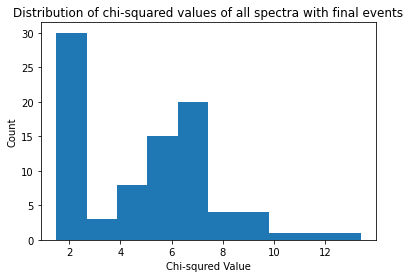

In [344]:
plt.hist(all_chi)
plt.xlabel('Chi-squred Value')
plt.ylabel('Count')
plt.title('Distribution of chi-squared values of all spectra with final events')
plt.show()

In [335]:
star = 'HIP47990'
# star = 'HIP68030'
pers_res[pers_res['star'] == star]

,Unnamed: 0,star,identifier,r shifted wl,r unshifted wl,r heights,r AMD heights,rounded r shifted wl,observation time,rounded r unshifted wl,best_mean_chi_squared
50,50,HIP47990,HIP47990_2,5576.804904,5576.804904,0.192518,6.564025,5576.8,2021-04-11T06:29:42.93,5576.80,3.72
51,51,HIP47990,HIP47990_1,5576.804904,5576.012188,0.221399,7.909538,5576.8,2021-04-11T06:08:58.76,5576.02,11.55
52,52,HIP47990,HIP47990_0,5576.804904,5576.804904,0.215581,7.494348,5576.8,2021-04-11T05:48:14.54,5576.80,5.82


In [326]:
# observed_wl = 5348.905360
rest_wl = 5896.526877

# observed_wl = 5405.7
# rest_wl = 5405.7

In [327]:
apf_files = np.load(apf_directory + star + '.npy')
observed_files = np.load(observed_directory + star + '.npy')
rest_files = np.load(rest_directory + star + '.npy')
resid_files = np.load(resid_directory + star + '.npy')

In [328]:
arr = np.round(wl_image, 1) == np.round(observed_wl, 1)
order = np.where(arr)[0][0]

## Plot SM residuals in rest frame

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP114430_0_NDRR.fits
HIP114430
2018-04-02T12:40:15.00


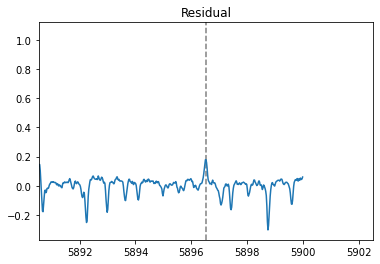

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP114430_1_NDRR.fits
HIP114430
2018-04-02T12:48:01.11


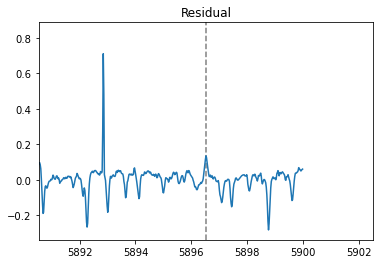

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP114430_12_NDRR.fits
HIP114430
2018-04-02T12:32:30.48


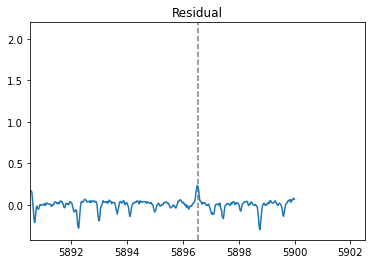

In [329]:
for file in resid_files:
    subfile = fits.open(file)
    flux = subfile[1].data
    wl = subfile[2].data
    
    header = subfile[0].header
    star = header['TOBJECT']
    date = header['DATE-OBS']
    print(file)
    print(star)
    print(date)
    plt.axvline(rest_wl, ls='--', color='gray')
    plt.plot(wl, flux)
    plt.xlim(rest_wl-6, rest_wl+6)
    plt.title('Residual')
    plt.show()

## Plot SM spectra in rest frame

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP114430_0_NDRS.fits
HIP114430
2018-04-02T12:40:15.00


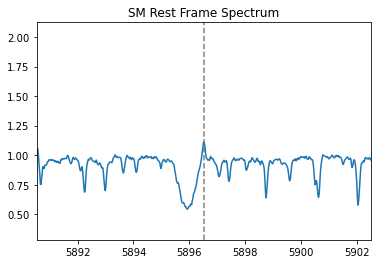

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP114430_1_NDRS.fits
HIP114430
2018-04-02T12:48:01.11


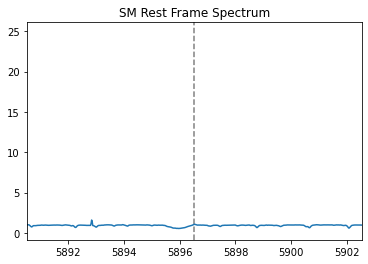

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP114430_12_NDRS.fits
HIP114430
2018-04-02T12:32:30.48


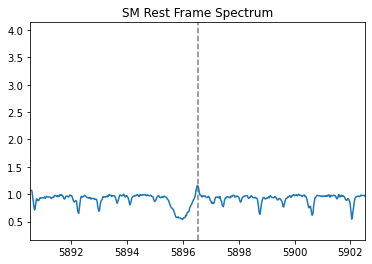

In [330]:
for file in rest_files:
    if 'NDRR' in file:
        print('skipped')
        continue
    subfile = fits.open(file)
    flux = subfile[0].data
    wl = subfile[1].data
    
    header = subfile[0].header
    star = header['TOBJECT']
    date = header['DATE-OBS']
    print(file)
    print(star)
    print(date)
    plt.axvline(rest_wl, ls='--', color='gray')
    plt.plot(wl, flux)
    plt.xlim(rest_wl - 6, rest_wl + 6)
    plt.title('SM Rest Frame Spectrum')
    plt.show()

## Plot SM spectra in observed frame

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP93747_1_NDRU.fits
HIP93747
2018-06-19T09:08:15.54


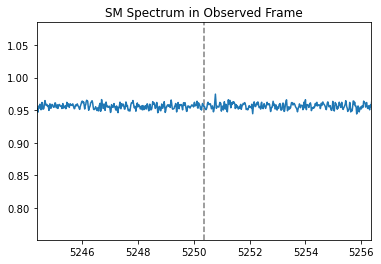

5899.98996409431
5000.005552883154
/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP93747_2_NDRU.fits
HIP93747
2018-06-19T09:10:11.69


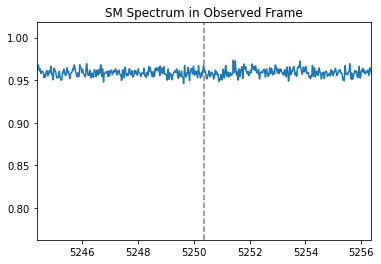

5899.98996409431
5000.005552883154
/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP93747_3_NDRU.fits
HIP93747
2018-06-19T09:09:13.84


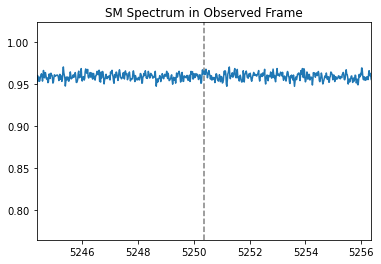

5899.98996409431
5000.005552883154


In [210]:
for file in observed_files:
    if 'NDRR' in file:
        continue
    subfile = fits.open(file)
    flux = subfile[0].data
    wl = subfile[1].data
    
    header = subfile[0].header
    star = header['TOBJECT']
    date = header['DATE-OBS']
    print(file)
    print(star)
    print(date)
    plt.axvline(observed_wl, ls='--', color='gray')
    plt.plot(wl, flux)
    plt.xlim(observed_wl - 6, observed_wl + 6)
    plt.title('SM Spectrum in Observed Frame')
    plt.show()
    print(max(wl))
    print(min(wl))

## Plot all the APF plots

HIP93747
2018-06-19T09:08:15.54
/datag/blpd0/datax/apf/rbfd.231.fits


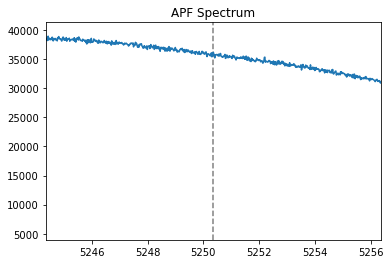

HIP93747
2018-06-19T09:10:11.69
/datag/blpd0/datax/apf/rbfd.233.fits


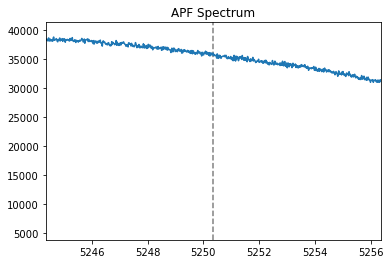

HIP93747
2018-06-19T09:09:13.84
/datag/blpd0/datax/apf/rbfd.232.fits


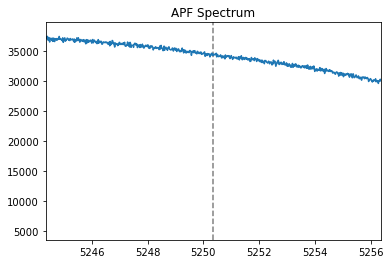

In [211]:
for file in apf_files:
    fl_file = fits.open(file)
    obj = fl_file[0].header['TOBJECT']
    date = fl_file[0].header['DATE-OBS']
    print(obj)
    print(date)
    print(file)
    fl_image = fl_file[0].data
    flux = fl_image[order][:-1]
    wl = wl_image[order]
    plt.axvline(observed_wl, ls = '--', color='gray')
    plt.plot(wl, flux)
#     plt.ylim(14000, 15000)
    plt.xlim(observed_wl - 6, observed_wl + 6)
    plt.title('APF Spectrum')
    plt.show()

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP47990_2_NDRR.fits
TIC286132427
2021-04-11T06:29:42.93


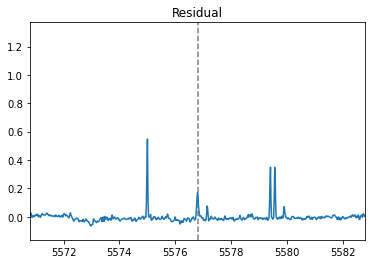

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP47990_2_NDRS.fits
TIC286132427
2021-04-11T06:29:42.93


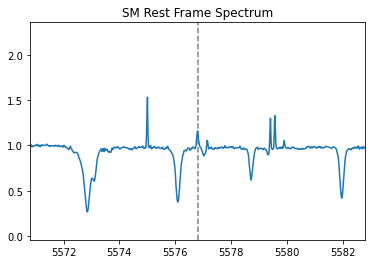

In [340]:
# manually plot residual and SM rest frame spectrum

identifier = 'HIP47990_2'

file = '/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/' + identifier + '_NDRR.fits'
rest_wl = 5576.804904

subfile = fits.open(file)
flux = subfile[1].data
wl = subfile[2].data

header = subfile[0].header
star = header['TOBJECT']
date = header['DATE-OBS']
print(file)
print(star)
print(date)
plt.axvline(rest_wl, ls='--', color='gray')
plt.plot(wl, flux)
plt.xlim(rest_wl-6, rest_wl+6)
plt.title('Residual')
plt.show()
    
    
file = '/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/' + identifier + '_NDRS.fits'

subfile = fits.open(file)
flux = subfile[0].data
wl = subfile[1].data

header = subfile[0].header
star = header['TOBJECT']
date = header['DATE-OBS']
print(file)
print(star)
print(date)
plt.axvline(rest_wl, ls='--', color='gray')
plt.plot(wl, flux)
plt.xlim(rest_wl - 6, rest_wl + 6)
plt.title('SM Rest Frame Spectrum')
plt.show()